In [1]:
import warnings

warnings.filterwarnings('ignore')

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets


import numpy as np
import matplotlib.pyplot as plt

## 선형 회귀 모델(Linear Regression Model)

### 데이터 생성

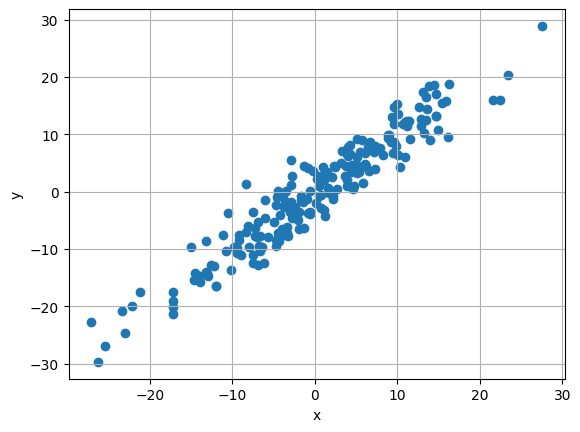

In [6]:
X = torch.randn(200, 1) * 10
y = X + 3 * torch.randn(200, 1)

plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

### 모델 정의 및 파라미터

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        pred = self.linear(x)
        return pred

In [10]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.2508]], requires_grad=True), Parameter containing:
tensor([-0.4354], requires_grad=True)]


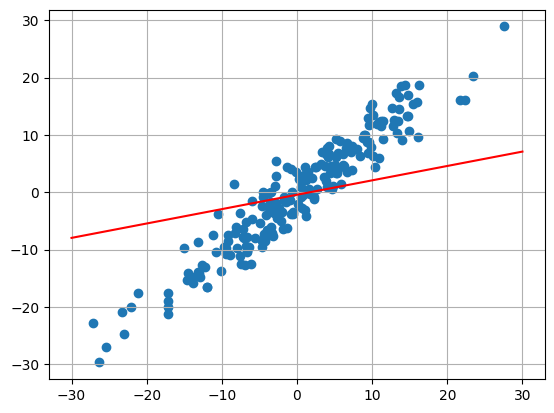

In [13]:
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()

### 손실 함수 및 옵티마이저

In [15]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

### 모델 학습

In [16]:
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()

    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    loss.backward()

    optimizer.step()

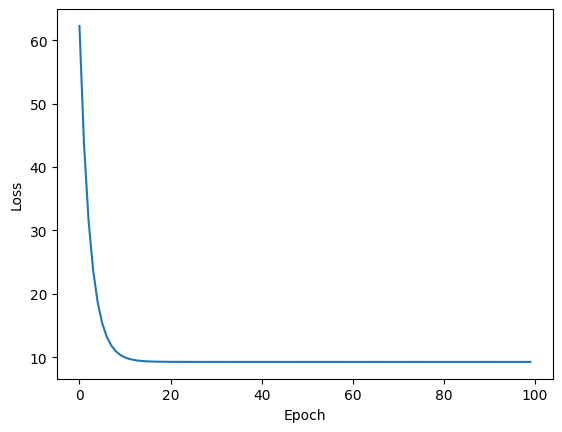

In [17]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

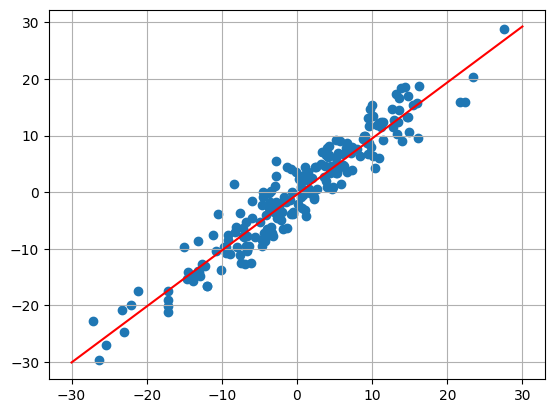

In [18]:
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()

## FashionMNIST 분류 모델

GPU 설정

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'mps')
device

device(type='mps')

### 데이터 로드

In [23]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))])

In [24]:
trainset = datasets.FashionMNIST(root='./data/',
                                 train=True, download=True,
                                 transform=transform)

testset = datasets.FashionMNIST(root='./data/',
                                 train=False, download=True,
                                 transform=transform)

100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [25]:
train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

In [26]:
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

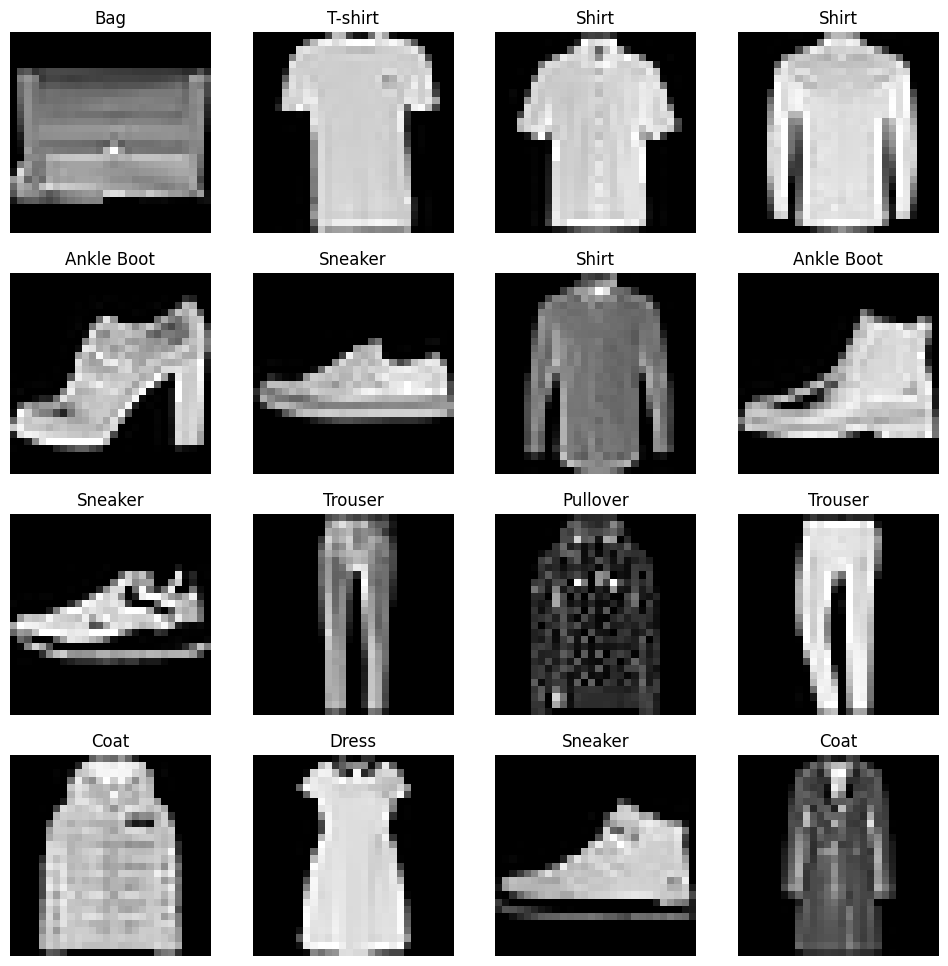

In [27]:
label_map = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

figure = plt.figure(figsize=(12,12))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    image = images[i].squeeze()
    label_idx = labels[i].item()
    label = label_map[label_idx]

    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(image, cmap='gray')

plt.show()

### 모델 정의 및 파라미터

In [39]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s 

        return num_features
    
net = NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [40]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [41]:
input = torch.randn(1,1,28,28)
out = net(input)
print(out)

tensor([[ 0.0682,  0.0819,  0.0036, -0.0152, -0.0613,  0.0206, -0.0257, -0.0659,
         -0.0828, -0.0257]], grad_fn=<AddmmBackward0>)


### 손실함수와 옵티마이저

In [42]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 모델 학습

배치수 확인

In [43]:
total_batch = len(train_loader)
print(total_batch)

469


In [44]:
for epoch in range(10):

    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:
            print('Epoch: {}, Iter: {}, Loss: {}'.format(epoch+1, i+1, running_loss/2000))
            running_loss == 0.0

Epoch: 1, Iter: 100, Loss: 0.11487032210826874
Epoch: 1, Iter: 200, Loss: 0.228915894985199
Epoch: 1, Iter: 300, Loss: 0.3414350556135178
Epoch: 1, Iter: 400, Loss: 0.44938237917423246
Epoch: 2, Iter: 100, Loss: 0.06883670514822006
Epoch: 2, Iter: 200, Loss: 0.11706329652667045
Epoch: 2, Iter: 300, Loss: 0.1582040810585022
Epoch: 2, Iter: 400, Loss: 0.19570527571439744
Epoch: 3, Iter: 100, Loss: 0.03450238858163357
Epoch: 3, Iter: 200, Loss: 0.06804385934770107
Epoch: 3, Iter: 300, Loss: 0.10040890726447105
Epoch: 3, Iter: 400, Loss: 0.13288044740259647
Epoch: 4, Iter: 100, Loss: 0.030718134835362433
Epoch: 4, Iter: 200, Loss: 0.06095016178488731
Epoch: 4, Iter: 300, Loss: 0.09046254774928093
Epoch: 4, Iter: 400, Loss: 0.12034861534833909
Epoch: 5, Iter: 100, Loss: 0.028203389316797257
Epoch: 5, Iter: 200, Loss: 0.056765182331204415
Epoch: 5, Iter: 300, Loss: 0.0845174351632595
Epoch: 5, Iter: 400, Loss: 0.11202751569449902
Epoch: 6, Iter: 100, Loss: 0.026419310122728346
Epoch: 6, Iter

### 모델의 저장 및 로드

- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드

In [45]:
PATH = './data/fashon_mnist.pth'
torch.save(net.state_dict(), PATH)

In [46]:
net = NeuralNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [47]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

### 모델 테스트

In [48]:
def imshow(image):
    image = image / 2 + 0.5
    npimg = image.numpy()

    fig = plt.figure(figsize=(16, 8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

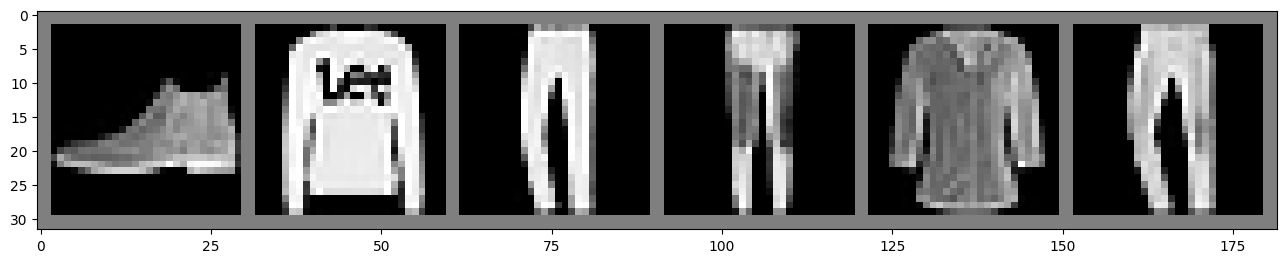

In [50]:
import torchvision

dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:6]))

In [51]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)
print(predicted)

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 6, 8, 0, 2, 5, 7, 5,
        1, 6, 6, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 3, 7, 2, 7, 2, 1,
        2, 6, 2, 2, 5, 8, 4, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 3, 4, 7, 8, 7, 0,
        2, 6, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 6, 7, 1, 8,
        0, 1, 2, 2, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4])


In [54]:
print(''.join('{}. '.format(label_map[int(predicted[j].numpy())]) for j in range(6)))

Ankle Boot. Pullover. Trouser. Trouser. Shirt. Trouser. 


In [55]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(100 * correct / total)

82.33
